# Project 3: Wage 

The dataset in this project, "Wages", was created by Christopher Cornwell and Peter Rupert.  It was published in the Journal of Applied Econometrics.  It looks at years of experience, weeks worked, whether one is blue collar, sex, whether an individual is in a union, and wage from the years 1976 to 1982.  The data was already tidy, I did not have to tidy it.  I chose this dataset because I am interested in how ones social demographics impact their earnings.   

In [1]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load the dataset and take a look at the first 5 and last 5 observations
wage = pd.read_csv("wage.csv", index_col=0)
wage.head(5)
wage.tail(5)

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
1,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
2,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
3,5,40,no,0,yes,no,yes,male,no,9,no,5.99645
4,6,39,no,0,yes,no,yes,male,no,9,no,5.99645
5,7,42,no,1,yes,no,yes,male,no,9,no,6.06146


,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
4161,3,50,no,0,no,yes,no,female,no,12,no,5.95324
4162,4,49,no,0,no,yes,no,female,no,12,no,6.06379
4163,5,50,no,0,no,yes,no,female,no,12,no,6.21461
4164,6,50,no,0,no,yes,no,female,no,12,no,6.29157
4165,7,50,no,0,no,yes,no,female,no,12,no,6.37161


#### As we can see, the dataset contains 4165 rows (participants) and 12 variables.  The variables are exp (years of full time work experience), wks (weeks worked), bluecol (whether or not participant had a blue color job), ind (whether the participant works in the manufacturing industry), south (whether the partipant lived in the south), smsa (resides in a metropolitan statistical area), married, sex, union (whether the participant belonged to a union), ed (years of education), black (whether the participant was Black), and lwage (log wage).

In [4]:
#Find number of rows and columns in the dataset
wage.shape

(4165, 12)

#### There are 4165 rows and 12 columns.

In [5]:
#Get summary statistics on the numeric variable "exp"
np.mean(wage.exp)
np.min(wage.exp)
np.max(wage.exp)

19.853781512605043

1

51

#### For the variable "exp" (years of full time work experience), the mean was 19.854 years.  The minimum was 1 year and the maximum was 51 years. 

In [6]:
#Get summary statistics on the categorical variable "union"
wage['union'].value_counts()

no     2649
yes    1516
Name: union, dtype: int64

#### 2649 participants in the study were not in a union and 1516 participants in the study were in a union.  

In [7]:
#Find the mean log wage for participants in a union versus not in  union
(wage.filter(['union', 'lwage'])
 .groupby('union')
 .agg('mean'))

,lwage
union,
no,6.673310
yes,6.681653


#### The mean log wage for participants in a union was 6.682 dollars.  The mean log wage for participants not in a union was 6.673 dollars.  Union members and non union members earn similar wages with union members earning slightly more. 

Text(0.5,0,'Years of Work Experience')

Text(0.5,1,'Frequency of Years of Work Experience')

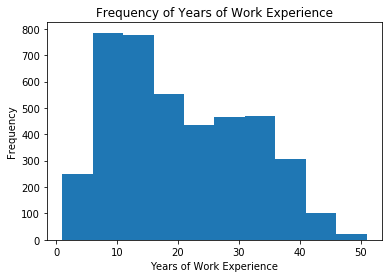

In [8]:
#Visualize the variable "exp" (years of full time work experience) 
wage['exp'].plot(kind = "hist")
plt.xlabel('Years of Work Experience') # add a label
plt.title("Frequency of Years of Work Experience")

#### The graph shows the distribution of the variable "exp".  The values of "exp" with the highest frequency were between 6 years and 15 years.  The data appears to skewed to the right.  

Text(0.5,0,'Years of Work Experience')

Text(0,0.5,'Log wage (dollars)')

Text(0.5,1,'Log Wage over Years of Work Experience')

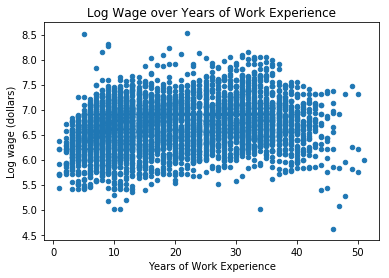

In [9]:
#Visualize how the variable "exp" relates to "lwage" (log wage in dollars). 
wage.plot.scatter(x = 'exp', y = 'lwage')
plt.xlabel("Years of Work Experience")
plt.ylabel("Log wage (dollars)")
plt.title("Log Wage over Years of Work Experience")

#### Contrary to my expectations, years of work experience and log wage do not appear to have a strong correlatation.  

Text(0.5,0,'Union')

Text(0,0.5,'Counts')

Text(0.5,1,'Number of Participants not in Union/ in Union')

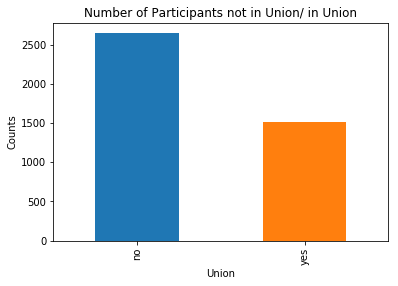

In [10]:
#Visualize the variable "union" (whether or not the participant belongs to a union)
wage['union'].value_counts().plot(kind = "bar")
plt.xlabel("Union")
plt.ylabel("Counts")
plt.title("Number of Participants not in Union/ in Union")

#### This graph displays the counts of participants who belonged to a union and participants who did not belong to a union.  As shown in the graph, more participants did not belong to a union.  